In [ ]:
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Paramètres de modèle / données
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
y_train = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test,NUM_CLASSES)

In [ ]:
model=keras.Sequential()

In [ ]:
  model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))

In [ ]:
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (32, 32, 3)))

In [ ]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape = (32, 32, 3)))

In [ ]:
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(256, input_shape = (256, )))

In [ ]:
model.add(layers.Dropout(0.5))

In [ ]:
model.add(layers.Dense(NUM_CLASSES, activation="softmax"))

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 82s 230ms/step - loss: 1.6781 - accuracy: 0.3908 - val_loss: 1.3817 - val_accuracy: 0.5120
Epoch 2/15
352/352 [==============================] - 82s 232ms/step - loss: 1.3460 - accuracy: 0.5211 - val_loss: 1.2137 - val_accuracy: 0.5822
Epoch 3/15
352/352 [==============================] - 85s 240ms/step - loss: 1.2056 - accuracy: 0.5751 - val_loss: 1.0732 - val_accuracy: 0.6302
Epoch 4/15
352/352 [==============================] - 81s 231ms/step - loss: 1.1026 - accuracy: 0.6162 - val_loss: 0.9922 - val_accuracy: 0.6572
Epoch 5/15
352/352 [==============================] - 81s 231ms/step - loss: 1.0360 - accuracy: 0.6398 - val_loss: 0.9467 - val_accuracy: 0.6734
Epoch 6/15
352/352 [==============================] - 81s 231ms/step - loss: 0.9885 - accuracy: 0.6586 - val_loss: 0.9008 - val_accuracy: 0.6938
Epoch 7/15
352/352 [==============================] - 81s 231ms/step - loss: 0.9509 - accuracy: 0.6710 - val_loss: 0.8740 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.7808 - accuracy: 0.7308
Test loss: 0.7807847261428833
Test accuracy: 0.7307999730110168


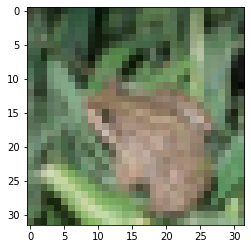

In [ ]:
image_index = 4
plt.imshow(x_test[image_index])

In [ ]:
x=model.predict(x_test[image_index].reshape(1,32, 32,3))

In [ ]:
print(x.argmax())

6
